# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

  project_subject_categories project_subject_subcategories  \
0        Literacy & Language                 ESL, Literacy   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0

In [6]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   
3                                             4                    1  232.90   
4                                             1                    1   67.98   

   quantity  
0        23  
1         1  
2        22  
3         4  
4         4

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of `project_grade_category`

In [9]:
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for j in catogories:
    temp = ""
    j=j.replace(' ','_') 
    j = j.replace('-','To') 
    temp+=j 
    cat_list.append(temp)
    
project_data['project_grade_category'] = cat_list



## 1.5 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57         Grades_PreKTo2   
1           FL        2016-10-25 09:22:10            Grades_6To8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1173.46it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.6 Preprocessing of `project_title`</font></h2>

In [20]:
# Displaying first two datasets 
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57         Grades_PreKTo2   
1           FL        2016-10-25 09:22:10            Grades_6To8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [21]:
# printing some random project titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year


In [22]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)   #re represents regular expression
    phrase = re.sub(r"can\'t", "can not", phrase)   #sub represents substute

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

We Need To Move It While We Input It!


In [24]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

We Need To Move It While We Input It!


In [25]:
#remove spacial character and converting to lowercase: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent).lower()
print(sent)

we need to move it while we input it 


In [26]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [27]:
sent = ' '.join(e for e in sent.split() if e not in stopwords)
print(sent)

need move input


In [28]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent).lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 24147.85it/s]


In [29]:
# after preprocesing
preprocessed_project_titles[20000]

'need move input'

## 2.1 Preparing data for models

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 2.2 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [31]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


In [32]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


In [33]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer('school_state', lowercase=False)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ", school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (50000, 51)


In [34]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_dict.keys()), lowercase=False)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades_9To12', 'Grades_6To8', 'Grades_3To5', 'Grades_PreKTo2']
Shape of matrix after one hot encodig  (50000, 4)


In [35]:
# we use count vectorizer to convert the values into one hot encoded features
project_data['teacher_prefix'].fillna(value='Teacher',inplace=True)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer('teacher_prefix', lowercase=False)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (50000, 5)


## 2.3 Vectorizing Text data

### Bag of words

#### Vectorizing Essay Text

In [36]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (50000, 5000)


#### Vectorizing Title Text

In [37]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_project_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (50000, 2039)


## 2.4 Vectorizing Numerical features

In [38]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

price_standardized = (project_data['price'].values.reshape(-1, 1))
price_standardized.shape

(50000, 1)

In [39]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

teacher_number_of_previously_posted_projects_standardized =(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized.shape

(50000, 1)

In [40]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

quantity_standardized = (project_data['quantity'].values.reshape(-1, 1))
quantity_standardized.shape

(50000, 1)

## 2.5 Merging all the above features

In [42]:
# Stacking for BOW
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((text_bow,title_bow,categories_one_hot, sub_categories_one_hot,school_state_one_hot,project_grade_category_one_hot,teacher_prefix_one_hot,title_bow, price_standardized,teacher_number_of_previously_posted_projects_standardized,quantity_standardized))
X.shape

(50000, 9180)

 <h3> 2.6 Dimensionality Reduction on the selected features</h3>

In [43]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2,k=5000).fit_transform(X,y)
print(X_new.shape)

(50000, 5000)


<h2>2.7 Apply Kmeans</h2>

In [48]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
cluster_range = range( 1, 11 )
score=[]
for i in cluster_range:
    kmeans=KMeans(n_clusters=i,random_state=0).fit(X_new)
    score.append(kmeans.inertia_)

In [49]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": score } )

In [50]:
clusters_df[0:10]

num_clusters  cluster_errors
0             1    7.161112e+08
1             2    3.893656e+08
2             3    2.250990e+08
3             4    1.289226e+08
4             5    9.021249e+07
5             6    6.271691e+07
6             7    4.895610e+07
7             8    3.949321e+07
8             9    3.171190e+07
9            10    2.642686e+07

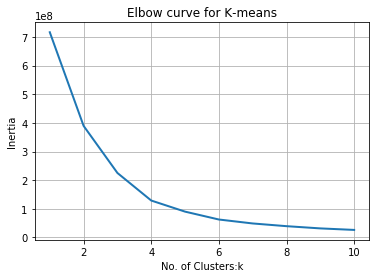

In [51]:
# Plotting Elbow Curve 
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,linewidth=2)
plt.grid()
plt.xlabel("No. of Clusters:k")
plt.ylabel("Inertia")
plt.title("Elbow curve for K-means")
plt.show()

In [52]:
# Applying k-means on n_clusters=2 and fitting
kmeans=KMeans(n_clusters=2,random_state=0).fit(X_new)

In [53]:
count=0;
project_title=[]
school_state=[]
price=[]
project_grade_category=[]
teacher_prefix=[]
clean_categories=[]
i=0
for i in range(5000):
    if(kmeans.predict(X_new[i])==0):
        project_title.append(project_data['project_title'][i])
        school_state.append(project_data['school_state'][i])
        price.append(project_data['price'][i])
        project_grade_category.append(project_data['project_grade_category'][i])
        teacher_prefix.append(project_data['teacher_prefix'][i])
        clean_categories.append(project_data['clean_categories'][i])
        count=count+1;
        if(count==5):
            break;

In [54]:
from pandas import DataFrame
cluster1={'Title':project_title,'State':school_state,'Price':price,'Project Grade':project_grade_category,'Teacher Prefix':teacher_prefix,'Subject category':clean_categories}
df_project_not_approved=DataFrame(cluster1,columns=['Title','State','Price','Project Grade','Teacher Prefix','Subject category'])

In [55]:
#printing cluster1 
df_project_not_approved

Title State   Price  \
0   Educational Support for English Learners at Home    IN  154.60   
1              Wanted: Projector for Hungry Learners    FL  299.00   
2  Soccer Equipment for AWESOME Middle School Stu...    AZ  516.85   
3                             Techie Kindergarteners    KY  232.90   
4                             Interactive Math Tools    TX   67.98   

    Project Grade Teacher Prefix                Subject category  
0  Grades_PreKTo2           Mrs.               Literacy_Language  
1     Grades_6To8            Mr.    History_Civics Health_Sports  
2     Grades_6To8            Ms.                   Health_Sports  
3  Grades_PreKTo2           Mrs.  Literacy_Language Math_Science  
4  Grades_PreKTo2           Mrs.                    Math_Science

In [56]:
count=0;
project_title=[]
school_state=[]
price=[]
project_grade_category=[]
teacher_prefix=[]
clean_categories=[]
i=0
for i in range(5000):
    if(kmeans.predict(X_new[i])==1):
        project_title.append(project_data['project_title'][i])
        school_state.append(project_data['school_state'][i])
        price.append(project_data['price'][i])
        project_grade_category.append(project_data['project_grade_category'][i])
        teacher_prefix.append(project_data['teacher_prefix'][i])
        clean_categories.append(project_data['clean_categories'][i])
        count=count+1;
        if(count==5):
            break;

In [67]:
from pandas import DataFrame
cluster2={'Title':project_title,'State':school_state,'Price':price,'Project Grade':project_grade_category,'Teacher Prefix':teacher_prefix,'Subject category':clean_categories}
df_project_approved=DataFrame(cluster2,columns=['Title','State','Price','Project Grade','Teacher Prefix','Subject category'])

In [68]:
#printing cluster2 
df_project_approved

Title State    Price   Project Grade  \
0               Wiggling Our Way to Success    OH   749.42     Grades_3To5   
1    Pressing on to Mastery After the Flood    LA  1366.91  Grades_PreKTo2   
2                           Stand and Learn    NY   869.00     Grades_6To8   
3  Picnic Table To Make Us ABLE To Do More!    CT   748.97     Grades_6To8   
4                Make Music, Make Our Year!    TX  4102.47     Grades_3To5   

  Teacher Prefix             Subject category  
0            Ms.                Health_Sports  
1           Mrs.                 Math_Science  
2            Mr.  Math_Science History_Civics  
3            Ms.                Health_Sports  
4            Ms.                   Music_Arts

In [201]:
#Reference:https://stackoverflow.com/questions/36184432/is-it-possible-to-retrieve-false-positives-false-negatives-identified-by-a-conf
from scipy.sparse import csr_matrix
words_P=[]

words_F=[]

for i in range(5000):
    if(kmeans.predict(X_new[i])==0):
        words_P.append(project_data['essay'][i])
    else:
        words_F.append(project_data['essay'][i])
        
#converting array to string as word cloud accepts string as a parameter
string1=''.join(str(e) for e in words_P)
string2=''.join(str(e) for e in words_F)

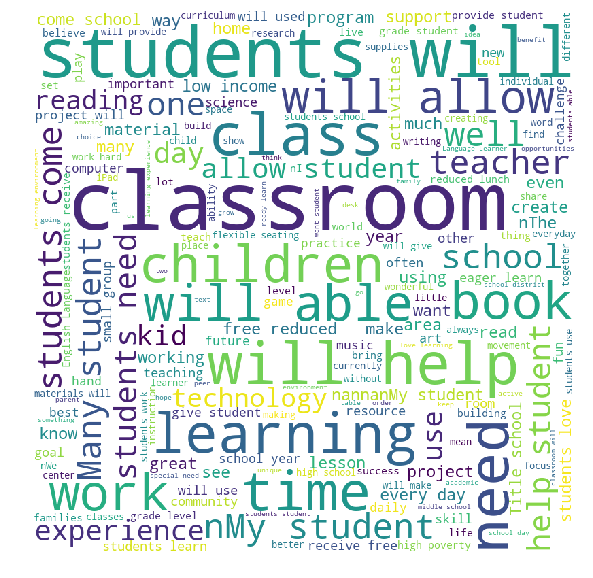

In [202]:
# Code for generating word Cloud
#Reference:https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(string1)
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

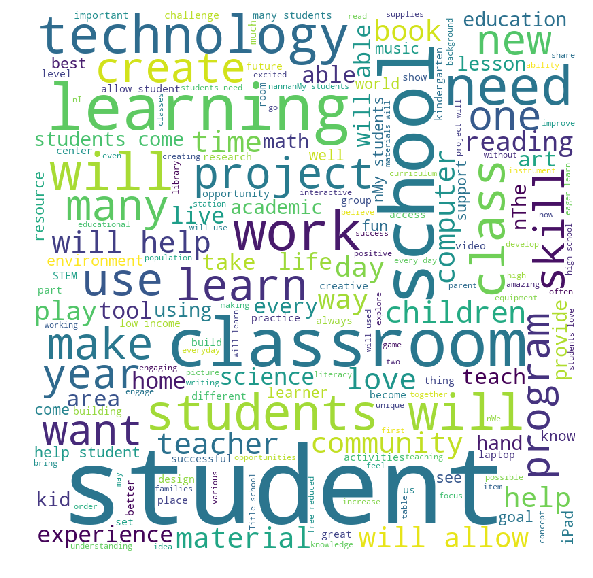

In [203]:
#Reference:https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(string2)
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h2>2.8 Apply Agglomerative Clustering</h2>

In [95]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=2, compute_full_tree=True)
clf.fit(X_new.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree=True,
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [96]:
# code borrowed from https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py

from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

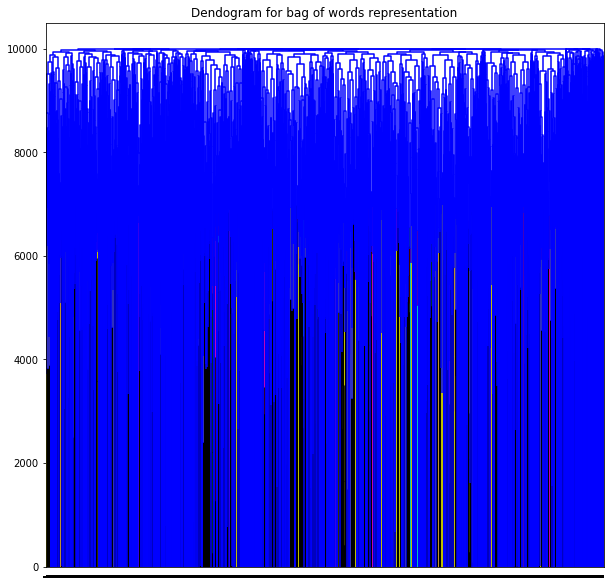

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
linkage_matrix=plot_dendrogram(clf, labels=clf.labels_)
plt.title('Dendogram for bag of words representation')
plt.show()

 #### Taking 2 clusters for BOW representation

In [98]:
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html
from scipy.cluster.hierarchy import fcluster
max_depth = 2
clusters = fcluster(linkage_matrix, max_depth, criterion='maxclust')

In [105]:
project_data['project_is_approved']=clusters
label=project_data.groupby(['project_is_approved'])['project_is_approved'].count()

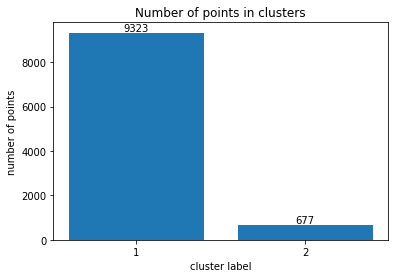

In [106]:
# Plotting bar plots  
fig, ax = plt.subplots()
cluster1 = ax.bar(list(range(1,len(label)+1)), label)

for i in cluster1:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2, height,'%d' % int(height))

plt.xticks(list(range(1,len(label)+1)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

#### Taking 5 clusters for BOW representation

In [107]:
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html
from scipy.cluster.hierarchy import fcluster
max_depth = 5
clusters = fcluster(linkage_matrix, max_depth, criterion='maxclust')

In [108]:
project_data['project_is_approved']=clusters
label=project_data.groupby(['project_is_approved'])['project_is_approved'].count()

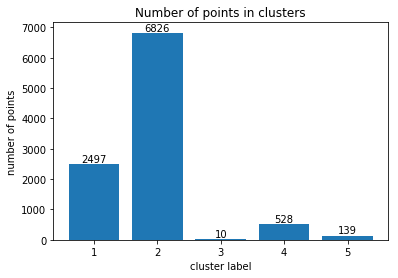

In [109]:
# Plotting bar plots  
fig, ax = plt.subplots()
cluster1 = ax.bar(list(range(1,len(label)+1)), label)

for i in cluster1:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2, height,'%d' % int(height))
    
plt.xticks(list(range(1,len(label)+1)))
plt.xlabel('cluster label')
plt.ylabel('number of points')
plt.title('Number of points in clusters')
plt.show()

<h2>2.9 Apply DBSCAN</h2>

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2,k=5000).fit_transform(X,y)
print(X_new.shape)

(50000, 5000)


In [44]:
# Reducing number of rows to 30000 
X_new=X_new[0:30000]
X_new.shape

(30000, 5000)

In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5000).fit(X_new)
distances, indices = neigh.kneighbors(X_new,n_neighbors=5000)

In [48]:
min_pts_dist = {'distance': distances[:,5000],'Indices': indices[:,5000] }     
                                                    
MinPts_Distance = pd.DataFrame(min_pts_dist,columns= ['distance','Indices' ])
MinPts_Distance.head()

distance  Indices
0   46.508538    10102
1   67.639610      930
2  147.204484    25883
3   54.823215    11792
4   49.945980    15042

In [49]:
# Sorting in ascending order according to Distance
MinPts_Distance.sort_values(by='distance',inplace=True)
MinPts_Distance.head()

distance  Indices
29931  42.213468    10401
19265  42.328630    13849
23856  42.409623      503
15848  42.442342    21297
4733   42.442716     3541

In [50]:
d=MinPts_Distance['distance'].values
i=MinPts_Distance['Indices'].values

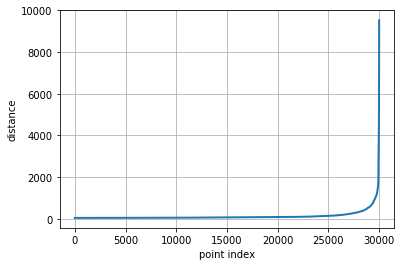

In [51]:
# Taking indices along X-axis and distances along Y-axis
plt.plot(np.sort(i),d,scalex='True', scaley='False',linewidth=2)
plt.grid()
plt.xlabel('point index')
plt.ylabel('distance')
plt.show()

In [52]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
db = DBSCAN(eps=500, min_samples=5000).fit(X_new)

In [53]:
count=0;
project_title=[]
school_state=[]
price=[]
project_grade_category=[]
teacher_prefix=[]
clean_categories=[]
i=0
for i in range(5000):
    if(kmeans.predict(X_new[i])==0):
        project_title.append(project_data['project_title'][i])
        school_state.append(project_data['school_state'][i])
        price.append(project_data['price'][i])
        project_grade_category.append(project_data['project_grade_category'][i])
        teacher_prefix.append(project_data['teacher_prefix'][i])
        clean_categories.append(project_data['clean_categories'][i])
        count=count+1;
        if(count==5):
            break;

In [54]:
from pandas import DataFrame
cluster1={'Title':project_title,'State':school_state,'Price':price,'Project Grade':project_grade_category,'Teacher Prefix':teacher_prefix,'Subject category':clean_categories}
df_project_not_approved=DataFrame(cluster1,columns=['Title','State','Price','Project Grade','Teacher Prefix','Subject category'])

In [55]:
#printing cluster1 
df_project_not_approved

Title State   Price  \
0   Educational Support for English Learners at Home    IN  154.60   
1              Wanted: Projector for Hungry Learners    FL  299.00   
2  Soccer Equipment for AWESOME Middle School Stu...    AZ  516.85   
3                             Techie Kindergarteners    KY  232.90   
4                             Interactive Math Tools    TX   67.98   

    Project Grade Teacher Prefix                Subject category  
0  Grades_PreKTo2           Mrs.               Literacy_Language  
1     Grades_6To8            Mr.    History_Civics Health_Sports  
2     Grades_6To8            Ms.                   Health_Sports  
3  Grades_PreKTo2           Mrs.  Literacy_Language Math_Science  
4  Grades_PreKTo2           Mrs.                    Math_Science

In [61]:
count=0;
project_title=[]
school_state=[]
price=[]
project_grade_category=[]
teacher_prefix=[]
clean_categories=[]
i=0
for i in range(5000):
    if(kmeans.predict(X_new[i])==1):
        project_title.append(project_data['project_title'][i])
        school_state.append(project_data['school_state'][i])
        price.append(project_data['price'][i])
        project_grade_category.append(project_data['project_grade_category'][i])
        teacher_prefix.append(project_data['teacher_prefix'][i])
        clean_categories.append(project_data['clean_categories'][i])
        count=count+1;
        if(count==5):
            break;

In [62]:
from pandas import DataFrame
cluster2={'Title':project_title,'State':school_state,'Price':price,'Project Grade':project_grade_category,'Teacher Prefix':teacher_prefix,'Subject category':clean_categories}
df_project_approved=DataFrame(cluster2,columns=['Title','State','Price','Project Grade','Teacher Prefix','Subject category'])

In [63]:
#printing cluster2 
df_project_approved

Title State    Price  \
0                        Make Music, Make Our Year!    TX  4102.47   
1                     Project Some Light Over Here!    CA  1521.97   
2  Behavior and Technology (A match made in Heaven)    FL  1526.33   
3               What do ya make of this? 3D Objects    DE  1599.00   
4           RECORDING LIVE MUSIC WITH A MACBOOK PRO    NY  1849.99   

  Project Grade Teacher Prefix                Subject category  
0   Grades_3To5            Ms.                      Music_Arts  
1   Grades_3To5            Ms.  Literacy_Language Math_Science  
2  Grades_9To12            Mr.   Health_Sports AppliedLearning  
3   Grades_3To5            Mr.       Math_Science SpecialNeeds  
4   Grades_6To8            Mr.                      Music_Arts

In [66]:
#Reference:https://stackoverflow.com/questions/36184432/is-it-possible-to-retrieve-false-positives-false-negatives-identified-by-a-conf
from scipy.sparse import csr_matrix
words_P=[]

words_F=[]

for i in range(5000):
    if(db.labels_[i]==0):
        words_P.append(project_data['essay'][i])
    else:
        words_F.append(project_data['essay'][i])
        
#converting array to string as word cloud accepts string as a parameter
string1=''.join(str(e) for e in words_P)
string2=''.join(str(e) for e in words_F)

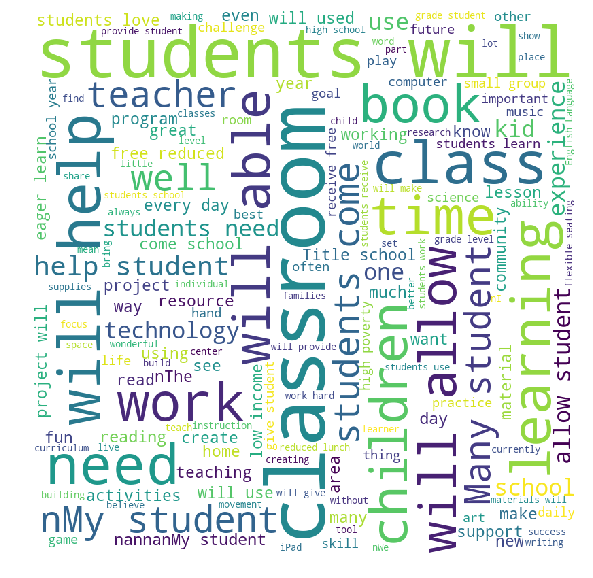

In [67]:
#Reference:https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(string1)
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

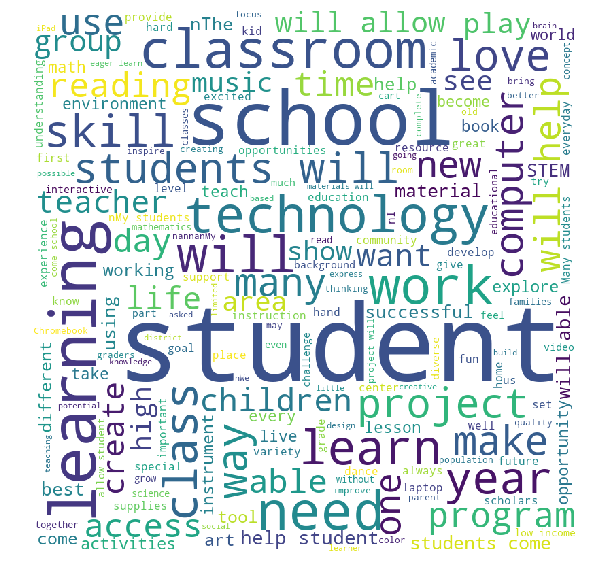

In [68]:
#Reference:https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(string2)
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h1>3. Conclusions</h1>


* All the clustering algorithms like K-Means,Agglomerative and DBSCAN clustering results in two clusters ie. One cluster having value as 0(Project Not Approved) and other as 1(Project Approved).
* In K-Means cluster2 seems to have much higher price than the cluster1.
* In Agglomerative Clustering, many point belong to Cluster 1 rather than Cluster 2.
* In DBSCAN cluster2 seems to have much higher price than the cluster1.
* All the clustering algorithms gives the similar set of clusters.